In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt


In [3]:
with open('./data_inputs/day9_input.txt') as f:
    raw_data = f.read()

In [4]:
data = raw_data.split("\n")
data = [[int(c) for c in l] for l in data]
hmap = np.array(data, dtype = np.uint8)

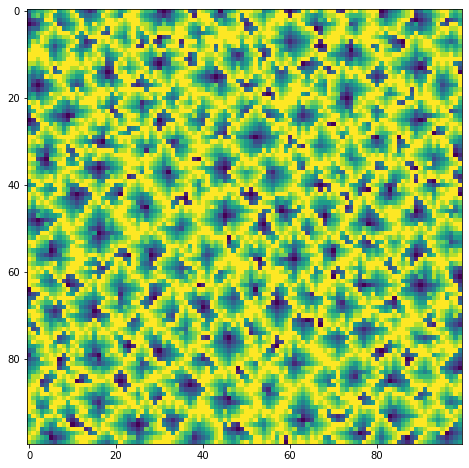

In [28]:
plt.imshow(hmap, interpolation="nearest")
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

In [6]:
# ----- Part 1 -----

lows = []

for i in range(hmap.shape[0]):
    for j in range(hmap.shape[1]):
        current = hmap[i,j]
        adjacents = []
        adjacents.append(hmap[i-1,j]) if i > 0 else None                # up
        adjacents.append(hmap[i+1,j]) if i < hmap.shape[0]-1 else None  # down
        adjacents.append(hmap[i,j-1]) if j > 0 else None                # left
        adjacents.append(hmap[i,j+1]) if j < hmap.shape[1]-1 else None  # right

        if np.all(current < adjacents):
            lows.append(current + 1)

result1 = np.sum(lows)

print(result1)


566


In [7]:
# ----- Part 2 -----

basins_map = np.zeros_like(hmap)      # 0 = not evaluated yet, 1 = 9 (peak), 2 or more = group basin id

In [8]:
def expand_basin_group(coords, basin_id):
    x, y = coords
    if basins_map[x,y] == 0:
        if hmap[x,y] == 9:
            basins_map[x,y] = 1
        else:
            basins_map[x,y] = basin_id

            adjacents = []
            if x > 0:
                if basins_map[x-1, y] == 0:
                    adjacents.append((x-1,y))
            if x < hmap.shape[0]-1:
                if basins_map[x+1, y] == 0:
                    adjacents.append((x+1,y))
            if y > 0:
                if basins_map[x, y-1] == 0:
                    adjacents.append((x,y-1))
            if y < hmap.shape[1]-1:
                if basins_map[x, y+1] == 0:
                    adjacents.append((x,y+1))

            if adjacents:
                for adjacent in adjacents:
                    expand_basin_group(adjacent, basin_id)


In [9]:
basin_ids_list = []
current_group_id = 2

for i in range(hmap.shape[0]):
    for j in range(hmap.shape[1]):
        if basins_map[i,j] == 0:
            if hmap[i,j] == 9:
                basins_map[i,j] = 1
            else:
                basin_ids_list.append(current_group_id)
                expand_basin_group((i,j), current_group_id)
                current_group_id += 1


In [10]:
count_group_points = [np.sum(basins_map == basin_id) for basin_id in range(2, 233)]
count_group_points.sort(reverse=True)
result2 = count_group_points[0] * count_group_points[1] * count_group_points[2]

print(result2)

891684


In [49]:
plot_basins_map = np.zeros((100,100), dtype = np.uint16)
plot_basins_map += basins_map.copy()
plot_basins_map[plot_basins_map == 1] += 238

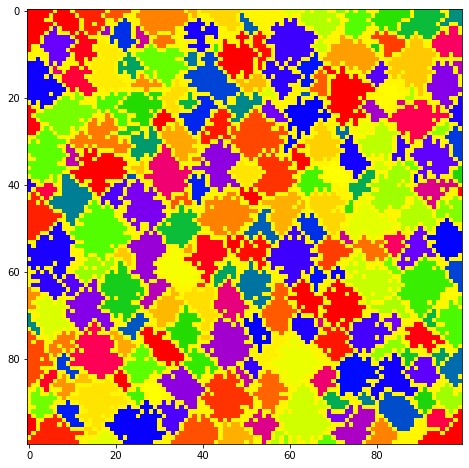

In [50]:
plt.imshow(plot_basins_map, cmap="prism")
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

In [13]:
import plotly.graph_objects as go

In [27]:
fig = go.Figure(data=go.Surface(z=hmap, colorscale='Viridis'))

fig.update_layout(autosize=False,
                  width=900, height=700,
                  scene = {"zaxis": {"nticks": 4},
                        "aspectratio": {"x": 2, "y": 2, "z": 0.1}})

fig.show()